In [42]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from pprint import pprint

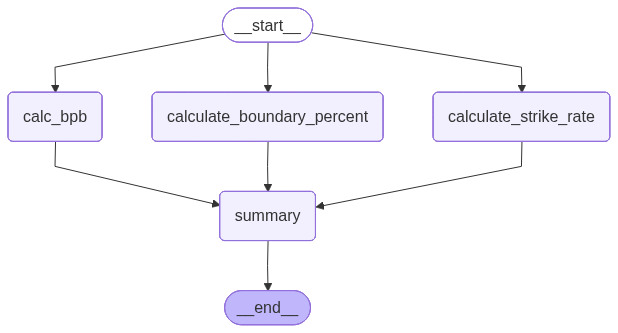

In [23]:
class BatsmaState(TypedDict):
    run:int
    ball:int
    four:int
    sixes:int

    strike_rate: float
    bpb: float
    boundary_percent: float
    summary: str

def calculate_strike_rate(state: BatsmaState) -> BatsmaState:
    strike_rate = (state['run'] / state['ball']) * 100 if state['ball'] > 0 else 0.0    
    return{'strike_rate':strike_rate}

def calculate_bpb(state: BatsmaState) -> BatsmaState:
    bpb = state['ball'] / (state['four'] + state['sixes'])
    return {'bpb': bpb}


def  calculate_boundary_percent(state: BatsmaState)-> BatsmaState:
    boundary_runs = state['four']*4+ state['sixes']*6
    boundary_percent = (boundary_runs/state['run'])*100 if state['run'] > 0 else 0.0
    return {'boundary_percent':boundary_percent}

def  summary(state: BatsmaState) -> BatsmaState:
    summary = f"""
    strike_rate: {state['strike_rate']:.2f}
    balls_per_boundary:{state['bpb']:.2f}
    boundary_percent: {state['boundary_percent']:.2f}%
    """
    return {'summary': summary}


graph = StateGraph(BatsmaState)

graph.add_node('calculate_strike_rate', calculate_strike_rate)
graph.add_node('calc_bpb', calc_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('summary', summary)

graph.add_edge(START,'calculate_strike_rate')
graph.add_edge(START,'calc_bpb')
graph.add_edge(START,'calculate_boundary_percent')

graph.add_edge('calculate_strike_rate','summary')
graph.add_edge('calc_bpb','summary')
graph.add_edge('calculate_boundary_percent','summary')

graph.add_edge('summary',END)

workflow = graph.compile()
workflow


In [24]:
initial_state = {
    'run': 100,
    'ball': 50,
    'four': 6,
    'sixes': 4,
}


In [25]:
output = workflow.invoke(initial_state)
pprint(output)

{'ball': 50,
 'boundary_percent': 48.0,
 'bpb': 10.0,
 'four': 6,
 'run': 100,
 'sixes': 4,
 'strike_rate': 200.0,
 'summary': '\n'
            '    strike_rate: 200.00\n'
            '    balls_per_boundary:10.00\n'
            '    boundary_percent: 48.00%\n'
            '    '}


In [30]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import load_dotenv
from pydantic import BaseModel,Field
from langchain_groq import ChatGroq


load_dotenv()

True

In [ ]:
model =  ChatGroq(
    model = 'llama-3.3-70b-versatile',
    temperature = 0.7,
    max_tokens = 2048
)

In [31]:
class EvaluationSchema(BaseModel):
    feedback: str = Field(description='Detailed feedback for the essay')
    score:float = Field(description = 'Score out of 10',ge=0,le=10)

structured_model = model.with_structured_output(EvaluationSchema)

In [35]:
essay = """
Passion is not to be rich

In a world that often measures success by the thickness of one's wallet or the prestige of one's job title, the concept of "passion" can seem like a risky luxury. From a young age, the question morphs from the whimsical "What do you want to be when you grow up?" to the more pragmatic "What's your dream job?"—a question that implicitly demands a career path that is both personally fulfilling and financially viable . We are bombarded with images of luxury and told to strive for riches, yet this pursuit often leads us down a path where the destination is wealth, but the journey is devoid of meaning. True passion, in its purest form, is not a vehicle for getting rich; it is an end in itself, a source of profound fulfillment that transcends monetary gain.

The central flaw in equating passion with wealth is that it confuses the reward with the journey. Passion is the innate, sometimes inexplicable, pull toward a particular activity—be it kite-flying, neurosurgery, or teaching—that makes the work itself the reward . It is the "thing that keeps you up at night because you're so excited about it" . When we prioritize money, we risk choosing a life of quiet desperation, trading the vibrancy of purpose for the sterility of a comfortable bank account. As one reflection poignantly notes, people often choose money not out of greed, but out of fear—the fear that "meaning doesn't pay rent" . The tragedy, however, is that while money solves the immediate problem of survival, it often builds a cage of comfort around us, slowly suffocating the very passions that once defined us. You may succeed at something that "doesn't feel like yours," leaving you with a life that looks full but feels profoundly empty .

Furthermore, a life consumed by the chase for wealth can lead to a form of spiritual poverty. If we judge our destiny and success by the number of digits in our income, we miss the point entirely. Something doesn't have to make you rich in order for it to be "meant to be" . An actor destined for the stage finds just as much purpose in a community theatre production as a Hollywood star does on a film set; the location and the salary do not dictate the passion or the merit . To believe that financial gain is the primary indicator of being "blessed" or successful is to worship a man-made construct, overlooking the true riches in life: family, friendship, peace of mind, and the simple satisfaction of a day spent doing what you love . The Danish plumber who amassed a world-class art collection not by seeking wealth, but by prioritizing his passion and living modestly, is a testament to this truth. His "riches" were invisible to the world, found in the beauty he collected and the discipline he practiced, not in the balance of his checking account
"""

In [37]:
prompt = f'Evaluate the Standard Essay Quality of the the following essay and provide me the detailed feedback and assign a score out pf 10:\n\n {essay}'
result = structured_model.invoke(prompt)
print(result)

feedback='The essay is well-written and effectively argues that passion is not about being rich, but about finding personal fulfillment. The author uses a variety of techniques, such as rhetorical questions, anecdotes, and metaphors, to make their point. The text is engaging and easy to follow, with a clear structure and logical flow of ideas. The author also provides several examples to support their argument, which adds depth and credibility to the essay. However, there are a few areas where the essay could be improved. At times, the language is a bit overly dramatic, and some of the sentences are quite long and convoluted. Additionally, the essay could benefit from a stronger conclusion that summarizes the main points and leaves the reader with something to think about. Overall, the essay is well-written and effectively argues its point, but could be improved with some revisions to language and structure.' score=8.0


In [38]:
print("feedback",result.feedback)

feedback The essay is well-written and effectively argues that passion is not about being rich, but about finding personal fulfillment. The author uses a variety of techniques, such as rhetorical questions, anecdotes, and metaphors, to make their point. The text is engaging and easy to follow, with a clear structure and logical flow of ideas. The author also provides several examples to support their argument, which adds depth and credibility to the essay. However, there are a few areas where the essay could be improved. At times, the language is a bit overly dramatic, and some of the sentences are quite long and convoluted. Additionally, the essay could benefit from a stronger conclusion that summarizes the main points and leaves the reader with something to think about. Overall, the essay is well-written and effectively argues its point, but could be improved with some revisions to language and structure.


In [39]:
print('Score',result.score)

Score 8.0


In [55]:
from typing import Annotated,operator
class EssayState(TypedDict):
    essay: str
    language_feedback: str
    analysis_feedback: str
    clarity_feedback: str
    overall_feedback: str
    individual_scores: Annotated[list[int],operator.add]
    avg_score: float


In [56]:
def evalution_language(state:EssayState) :
    prompt = f"Evaluate the language quality of the following essay and provide a feedback and score out of 10:\n\n{state['essay']}"
    output = structured_model.invoke(prompt)
    return {
        'language_feedback': [output.feedback],
        'language_scores': [output.score]
    }

def evaluate_analysis(state:EssayState):
    prompt = f"Evaluate the depth of analysis in the following essay and provide a feedback and score out of 10:\n\n{state['essay']}"
    output = structured_model.invoke(prompt)
    return {
        'analysis_feedback': [output.feedback],
        'individual_score': [output.score]
    }

def evaluation_thought(state:EssayState) :
    prompt = f"Evaluate the clarity of thought in the following essay and provide a feedback and score out of 10:\n\n{state['essay']}"
    output = structured_model.invoke(prompt)
    return {
        'clarity_feedback': [output.feedback],
        'individual_scores': [output.score]
    }

def final_evaluation(state: EssayState):
    prompt = f'Based on the following feedbacks create a summarized feedback \n language feedback - {state["language_feedback"]} \n depth of analysis feedback - {state["analysis_feedback"]} \n clarity of thought feedback - {state["clarity_feedback"]}'
    overall_feedback = model.invoke(prompt).content

    # avg calculate
    avg_score = sum(state['individual_scores'])/len(state['individual_scores'])

    return {'overall_feedback': overall_feedback, 'avg_score': avg_score}
    


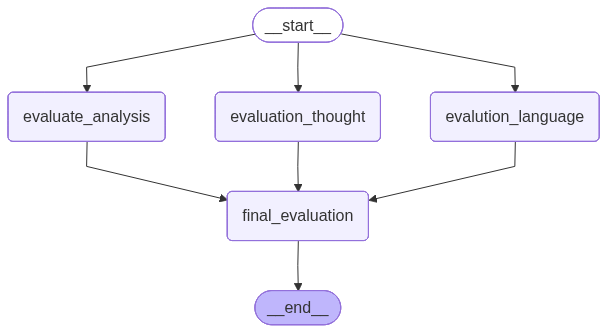

In [57]:
graph = StateGraph(EssayState)

graph.add_node('evalution_language', evalution_language)
graph.add_node('evaluate_analysis', evaluate_analysis)
graph.add_node('evaluation_thought', evaluation_thought)
graph.add_node('final_evaluation', final_evaluation)

# edges
graph.add_edge(START, 'evalution_language')
graph.add_edge(START, 'evaluate_analysis')
graph.add_edge(START, 'evaluation_thought')

graph.add_edge('evalution_language', 'final_evaluation')
graph.add_edge('evaluate_analysis', 'final_evaluation')
graph.add_edge('evaluation_thought', 'final_evaluation')

graph.add_edge('final_evaluation', END)

workflow = graph.compile()

workflow


In [58]:
intial_state = {
    'essay': essay
}

workflow.invoke(intial_state)


{'essay': '\nPassion is not to be rich\n\nIn a world that often measures success by the thickness of one\'s wallet or the prestige of one\'s job title, the concept of "passion" can seem like a risky luxury. From a young age, the question morphs from the whimsical "What do you want to be when you grow up?" to the more pragmatic "What\'s your dream job?"—a question that implicitly demands a career path that is both personally fulfilling and financially viable . We are bombarded with images of luxury and told to strive for riches, yet this pursuit often leads us down a path where the destination is wealth, but the journey is devoid of meaning. True passion, in its purest form, is not a vehicle for getting rich; it is an end in itself, a source of profound fulfillment that transcends monetary gain.\n\nThe central flaw in equating passion with wealth is that it confuses the reward with the journey. Passion is the innate, sometimes inexplicable, pull toward a particular activity—be it kite-f